In [38]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [129]:
# Model 3a: 2 predators, 2 prey, each predator can eat each prey, without predator-predator killing

# x1 = population density of prey 1
# x2 = population density of prey 2
# y1 = population density of predator 1
# y2 = population density of predator 2

# Initializing parameters
a1 = 0.5 # prey 1 growth rate
a2 = 0.4 # prey 2 growth rate

b11 = 0.06 # predator 1 kill rate of prey 1
b12 = 0.03 # predator 1 kill rate of prey 2
b21 = 0.05 # predator 2 kill rate of prey 1
b22 = 0.02 # predator 2 kill rate of prey 2

c1 = 0.1 # predator 1 death rate
c2 = 0.05 # predator 2 death rate

d11 = 0.1 # predator 1 growth rate from eating prey 1
d12 = 0.05 # predator 1 growth rate from eating prey 2
d21 = 0.01 # predator 2 growth rate from eating prey 1
d22 = 0.15 # predator 2 growth rate from eating prey 2

# Defining Lotka-Volterra differential equations
def dSdt1(S, t):
    x1, x2, y1, y2 = S
    return [a1*x1 - b11*x1*y1 - b21*x1*y2, 
            a2*x2 - b12*x2*y1 - b22*x2*y2,
            -c1*y1 + d11*x1*y1 + b21*d12*x2*y1,
            -c2*y2 + d21*x1*y2 + b22*d22*x2*y2
            ]

In [131]:
# Comparing ODE

# Initializing population densities
x10 = 20
x20 = 30
y10 = 10
y20 = 15

S0 = (x10, x20, y10, y20)

t = np.linspace(0, 300, 1000) # time array

# SciPy ODEint Solver
sol1 = odeint(dSdt1, S0, t)
x1, x2, y1, y2 = sol1.T

# Runge-Kutta ODE Solver
def odeSolver(S0, dSdt, total_time, time_steps):
    """
    Solves a system of ODEs using the "RK4" Runge-Kutta method

    Parameters:
        S0: (list) representing all initial populations
        dSdt: function representing the system of ODEs
            -takes current populations and time as parameters
            -returns a list describing the LV derivative equations 
        total_time: (float) total time frame for which the ODE is solved in
        time_steps: (int) number of time points over total_time interval

    Returns:
        S: (NumPy array) array of shape (n, time_steps) containing the population values at each time step
            -n = number of variables
        t: (NumPy array) array containing time points corresponding to the time steps from 0 to total_time
    """
    n = len(S0) # number of variables
    S = np.zeros((n, time_steps)) # solution array
    t = np.linspace(0, total_time, time_steps) # time array
    h = t[1] - t[0] # time step size

    # Defining initial values
    for i in range(n):
        S[i, 0] = S0[i]

    # Implementing Runge-Kutta equations
    for i in range(time_steps - 1):
        k1 = np.array(dSdt(S[:, i], t[i]))
        k2 = np.array(dSdt(S[:, i] + h/2 * k1, t[i] + h/2))
        k3 = np.array(dSdt(S[:, i] + h/2 * k2, t[i] + h/2))
        k4 = np.array(dSdt(S[:, i] + h * k3, t[i] + h))
        
        S[:, i + 1] = S[:, i] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

    return S, t

# Runge-Kutta ODE Solver
S, t = odeSolver(S0, dSdt1, 300, 1000)

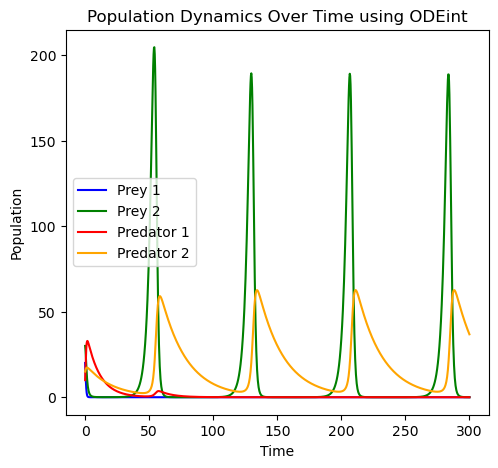

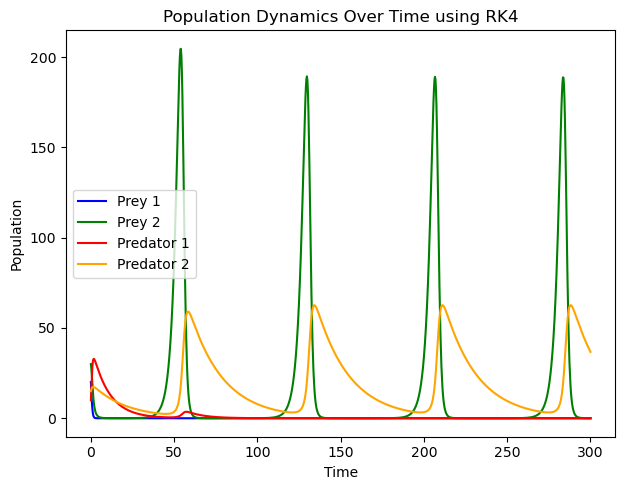

In [133]:
# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x1, label = "Prey 1", color = "blue")
plt.plot(t, x2, label = "Prey 2", color = "green")
plt.plot(t, y1, label = "Predator 1", color = "red")
plt.plot(t, y2, label = "Predator 2", color = "orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey 1", color = "blue")
plt.plot(t, S[1], label = "Prey 2", color = "green")
plt.plot(t, S[2], label = "Predator 1", color = "red")
plt.plot(t, S[3], label = "Predator 2", color = "orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4")
plt.tight_layout()
plt.show()

In [135]:
# Model 3b: 2 predators, 2 prey, predator 1 can eat both prey, predator 2 can eat only prey 1, without predator-predator killing

# Initializing parameters
a1 = 0.5 # prey 1 growth rate
a2 = 0.4 # prey 2 growth rate

b11 = 0.02 # predator 1 kill rate of prey 1
b12 = 0.03 # predator 1 kill rate of prey 2
b21 = 0.02 # predator 2 kill rate of prey 1

c1 = 0.1 # predator 1 death rate
c2 = 0.1 # predator 2 death rate

d11 = 0.1 # predator 1 growth rate from eating prey 1
d12 = 0.05 # predator 1 growth rate from eating prey 2
d21 = 0.01 # predator 2 growth rate from eating prey 1

# Defining Lotka-Volterra differential equations
def dSdt2(S, t):
    x1, x2, y1, y2 = S
    
            # Prey populations
    return [a1*x1 - b11*x1*y1 - b21*x1*y2, 
            a2*x2 - b12*x2*y1,

            # Predator populations
            -c1*y1 + b11*d11*x1*y1 + d12*x2*y1,
            -c2*y2 + b12*d21*x1*y2
           ]

In [137]:
# Comparing ODE

# Initializing population densities
x10 = 60
x20 = 80
y10 = 10
y20 = 20

S0 = (x10, x20, y10, y20)

t = np.linspace(0, 300, 1000) # time array

# SciPy ODEint Solver
sol2 = odeint(dSdt2, S0, t)
x1, x2, y1, y2 = sol2.T

# Runge-Kutta ODE Solver
S, t = odeSolver(S0, dSdt2, 300, 1000)

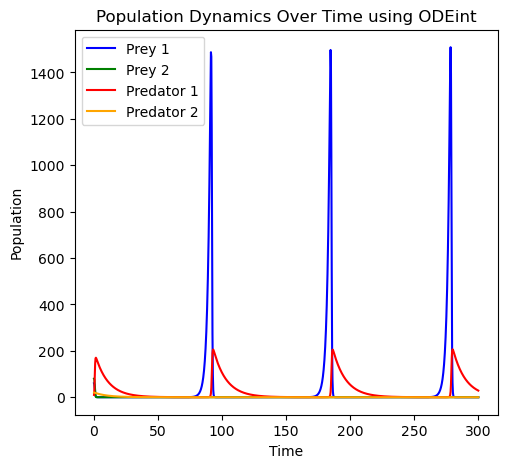

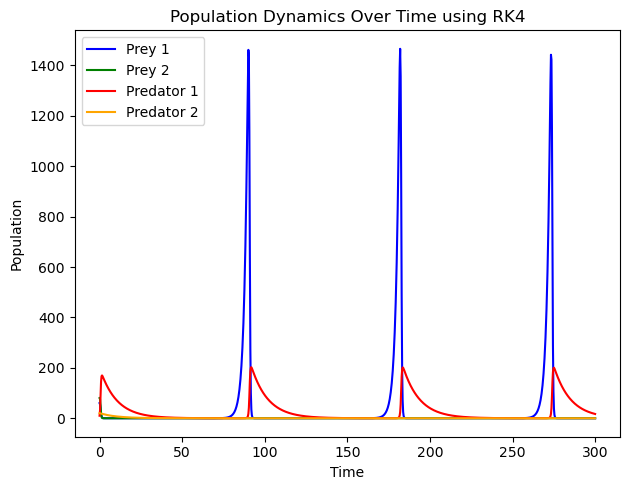

In [139]:
# Plotting populations over time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x1, label = "Prey 1", color = "blue")
plt.plot(t, x2, label = "Prey 2", color = "green")
plt.plot(t, y1, label = "Predator 1", color = "red")
plt.plot(t, y2, label = "Predator 2", color = "orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using ODEint")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(t, S[0], label = "Prey 1", color = "blue")
plt.plot(t, S[1], label = "Prey 2", color = "green")
plt.plot(t, S[2], label = "Predator 1", color = "red")
plt.plot(t, S[3], label = "Predator 2", color = "orange")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time using RK4")
plt.tight_layout()
plt.show()

# Predator 2 extinction much more likely due to increased competition for prey 1
# Prey 2 population grows as there is less competition for it

# If predator-predator killing were also to be added to the model, predator extinction is almost certain